<a href="https://colab.research.google.com/github/AlejoGalloM/MachineLearning/blob/master/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Heart Disease Data***

***Proceso de verificacion del articulo cientifico de comparacion de metodos de machine learnng elegido para el parcial***



In [287]:
#Importaciones utilizadas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix, roc_curve, roc_auc_score
from sklearn.naive_bayes import GaussianNB


In [267]:
#Se leen los datos de la base y se agregan sus etiquitas correspondientes para cada columno
col_names = ["age","sex","cp","trestbps","chol","fbs","restecg","thalach","exang","oldpeak","slope","ca","thal","diagnos"]

path = 'drive/MyDrive/data/heart.csv'
heart = pd.read_csv(path)
heart = heart.set_axis(col_names, axis = 1)

In [268]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnos
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [269]:
#Se elimina la columna de diagnos para tener solo las caracteristicas de cada paciente
X = heart.drop('diagnos', axis = 1)

#Se asignan los diagnos a variable de y
y = heart.diagnos

In [270]:
#Se obtiene la frecuencia con la que se tratan los datos en la columna de trestbps y thalach
frecuencia_trestbps = pd.value_counts(heart["trestbps"])
frecuencia_thalach = pd.value_counts(heart["thalach"])

In [271]:
frec_frame = pd.DataFrame(frecuencia_trestbps)
frec_frame_thalach = pd.DataFrame(frecuencia_thalach)

#Se le asigna la etiqueta de frecuencia
frec_frame.columns = ["frec_trestbps"]
frec_frame_thalach.columns = ["frec_thalach"]

In [272]:
#Se saca la frecuencia relativa
frec_frame["frec_rel_%"]=100*frec_frame["frec_trestbps"]/len(heart)
frec_frame_thalach["frec_rel_%"]=100*frec_frame_thalach["frec_thalach"]/len(heart)

In [273]:
#Se calcula la frecuencia acumulada para valores de trestbps
frec_acum = []
valor_acum = np.int(0);

#Se suman las frecuencias relativas trestbps
for i in frec_frame["frec_rel_%"].values:
  valor_acum += i
  frec_acum.append(valor_acum)
frec_frame["frec_rel_%_acum"] = frec_acum
frec_frame.head(3)

,frec_trestbps,frec_rel_%,frec_rel_%_acum
120,37,12.211221,12.211221
130,36,11.881188,24.092409
140,32,10.561056,34.653465


In [274]:
#Se calcula la frecuencia acumulada para valores de thalach
frec_acum_thalach = []
valor_acum_thalach = np.int(0);

#Se suman las frecuencias relativas thalach
for i in frec_frame_thalach["frec_rel_%"].values:
  valor_acum_thalach += i
  frec_acum_thalach.append(valor_acum_thalach)
  
frec_frame_thalach["frec_rel_%_acum"] = frec_acum_thalach
frec_frame_thalach.head(3)

,frec_thalach,frec_rel_%,frec_rel_%_acum
162,11,3.630363,3.630363
160,9,2.970297,6.600660
163,9,2.970297,9.570957


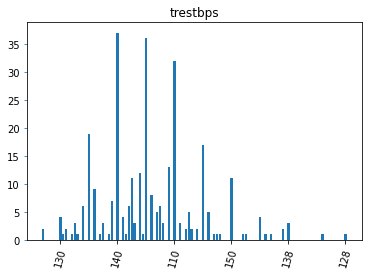

In [275]:
#Creacion de diagrama de pareto comparando frecuencia con trestbps
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.set_title("trestbps")
ax.bar(frec_frame.index, frec_frame["frec_trestbps"], color="C0")
ax.tick_params(axis="y", color="C0")
ax.set_xticklabels(frec_frame.index, rotation=75)
plt.show()

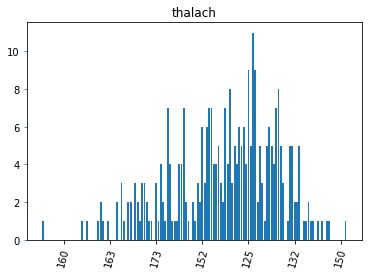

In [276]:
#Creacion de diagrama de pareto comparando frecuencia con thalach
fig = plt.figure();
ax = fig.add_subplot(1,1,1)
ax.set_title("thalach")
ax.bar(frec_frame_thalach.index, frec_frame_thalach["frec_thalach"], color="C0")
ax.tick_params(axis="y", color="C0")
ax.set_xticklabels(frec_frame_thalach.index, rotation=75)
plt.show()

In [277]:
#Se realiza separacion de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 4) 
scaler = StandardScaler()

#Se realiza la tranformacio nde los datos de entrenamiento y de test
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [278]:
clf = SVC(kernel = 'rbf', probability = True)
parameters = {'C' : np.logspace(-4,4,9), 'gamma' : np.logspace(-4,4,9)}

In [288]:
#Creacion modelo para diagrama de Naive Bayes
Bayes_model = GaussianNB()

#Creacion de modelo para arboles de decision
tree_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 4, random_state = 1)

#Validación cruzada para c y gamma
SVM_model = GridSearchCV(clf, param_grid = parameters, cv = 5)

SVM_model.fit(X_train, y_train)
Bayes_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

print('Mejores parámetros: ', SVM_model.best_params_)

Mejores parámetros:  {'C': 100.0, 'gamma': 0.001}


In [289]:
#Se entrena nuevamente  el modelo SVM con los resultado arrojados de gamma y C optimos
SVM_model = SVC(kernel = 'rbf', probability = True, C = SVM_model.best_params_['C'], gamma = SVM_model.best_params_['gamma'])
SVM_model.fit(X_train, y_train)

#Se optienen las predicciones para los modelos de SVM y Naive Bayes
y_pred = SVM_model.predict(X_test)
y_pred_bayes = Bayes_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

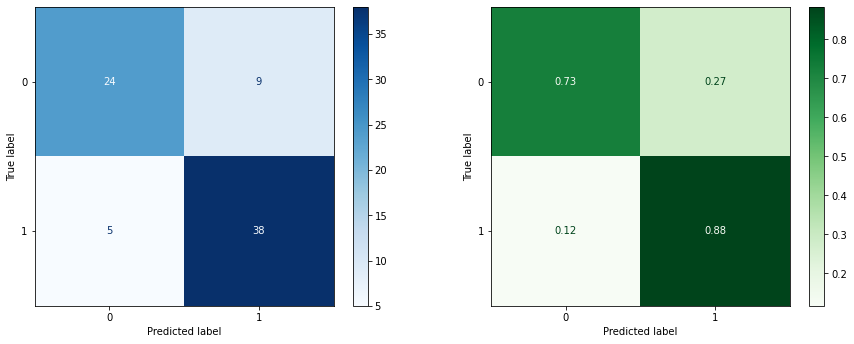

In [281]:
 #Se grafican las matrices de confucion para metodo de SVM
 plt.figure(figsize = (15,5.5))
 fig = plt.subplot(1,2,1)
 plot_confusion_matrix(SVM_model, X_test, y_test, values_format = '.0f', cmap = 'Blues', ax = fig);
 fig = plt.subplot(1,2,2)
 plot_confusion_matrix(SVM_model, X_test, y_test, normalize = 'true', cmap = 'Greens', ax = fig);

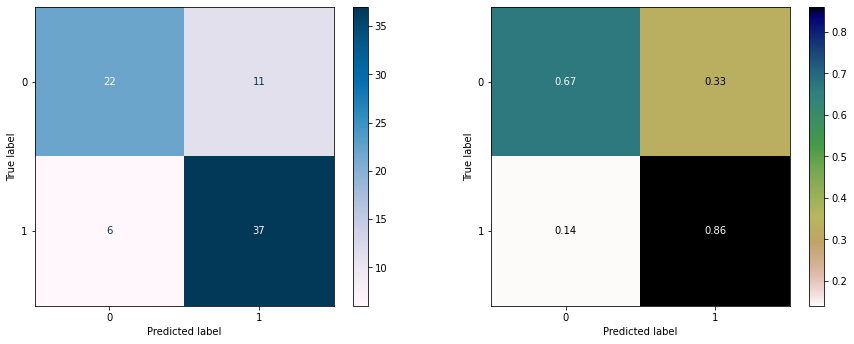

In [282]:
 #Se grafican las matrices de confucion para metodo de Naive Bayes
 plt.figure(figsize = (15,5.5))
 fig = plt.subplot(1,2,1)
 plot_confusion_matrix(Bayes_model, X_test, y_test, values_format = '.0f', cmap = 'PuBu', ax = fig);
 fig = plt.subplot(1,2,2)
 plot_confusion_matrix(Bayes_model, X_test, y_test, normalize = 'true', cmap = 'gist_earth_r', ax = fig);

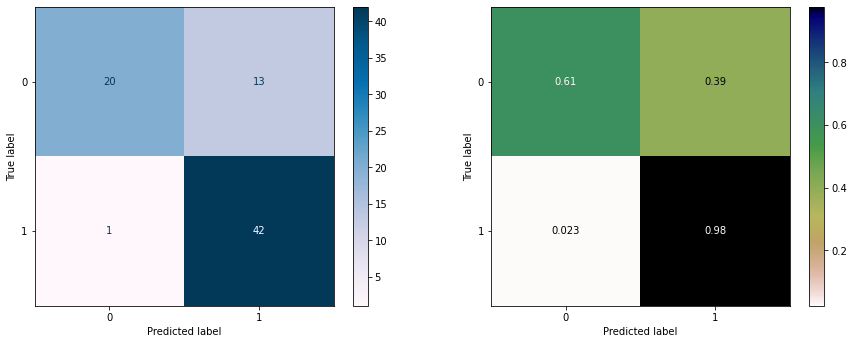

In [291]:
#Se grafican las matrices de confucion para metodo de Arboles de decision
plt.figure(figsize = (15,5.5))
fig = plt.subplot(1,2,1)
plot_confusion_matrix(tree_model, X_test, y_test, values_format = '.0f', cmap = 'PuBu', ax = fig);
fig = plt.subplot(1,2,2)
plot_confusion_matrix(tree_model, X_test, y_test, normalize = 'true', cmap = 'gist_earth_r', ax = fig);

In [293]:
print('Accuracy en entrenamiento SVM: {:.2f}'.format(SVM_model.score(X_train, y_train)))
print('Accuracy en test SVM: {:.2f}'.format(SVM_model.score(X_test, y_test)))
print('')
print('Accuracy en entrenamiento Naive Bayes: {:.2f}'.format(Bayes_model.score(X_train, y_train)))
print('Accuracy en test Naive Bayes: {:.2f}'.format(Bayes_model.score(X_test, y_test)))
print('')
print('Accuracy en entrenamiento DT: {:.2f}'.format(tree_model.score(X_train, y_train)))
print('Accuracy en test DT: {:.2f}'.format(tree_model.score(X_test, y_test)))

Accuracy en entrenamiento SVM: 0.88
Accuracy en test SVM: 0.82

Accuracy en entrenamiento Naive Bayes: 0.85
Accuracy en test Naive Bayes: 0.78

Accuracy en entrenamiento DT: 0.89
Accuracy en test DT: 0.82


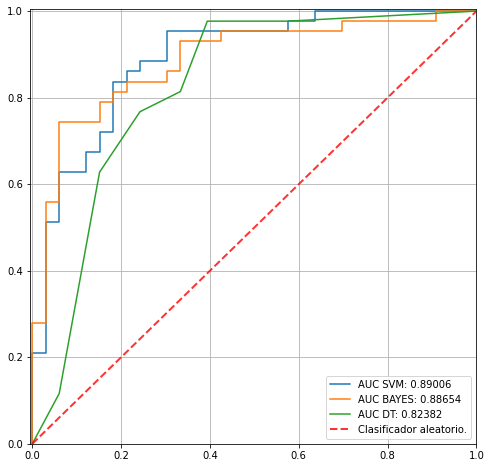

In [295]:
#Se realiza grafico de comparativa para ver la diferencia entre los metodos implementados

plt.figure(figsize = (8,8))
y_pre_proba = SVM_model.predict_proba(X_test)[:,1]
y_pre_bayes_proba = Bayes_model.predict_proba(X_test)[:,1]
y_pre_dt_proba = tree_model.predict_proba(X_test)[:,1]

fpr, tpr, _ = roc_curve(y_test, y_pre_proba)
fprBayes, tprBayes, _ = roc_curve(y_test, y_pre_bayes_proba)
fprDT, tprDT, _ = roc_curve(y_test, y_pre_dt_proba)

auc = roc_auc_score(y_test, y_pre_proba)
aucBayes = roc_auc_score(y_test, y_pre_bayes_proba)
aucDT = roc_auc_score(y_test, y_pre_dt_proba)

plt.plot(fpr,tpr, label = 'AUC SVM: {:.5f}'.format(auc));
plt.plot(fprBayes,tprBayes, label = 'AUC BAYES: {:.5f}'.format(aucBayes));
plt.plot(fprDT,tprDT, label = 'AUC DT: {:.5f}'.format(aucDT));

plt.plot([0,1],[0,1], linestyle = '--', lw = 2, color = 'r', alpha = 0.8, label = 'Clasificador aleatorio.');

plt.grid();
plt.legend();
plt.xlim([-0.005,1]);
plt.ylim([0,1.005]);

In [284]:
#Obtenemos los reportes de clasificacion para metodo SVM
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.73      0.77        33
           1       0.81      0.88      0.84        43

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



In [285]:
#Obtenemos los reportes de clasificacion para metodo Naive Bayes
print(classification_report(y_test, y_pred_bayes))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72        33
           1       0.77      0.86      0.81        43

    accuracy                           0.78        76
   macro avg       0.78      0.76      0.77        76
weighted avg       0.78      0.78      0.77        76



In [ ]:
#Obtenemos los reportes de clasificacion para metodo Naive Bayes
print(classification_report(y_test, y_pred_bayes))